<a href="https://colab.research.google.com/github/manikBS/omscs-capstone/blob/master/portfolio_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

GOOGLE_DRIVE_PATH_POST_MYDRIVE = 'capstone_project'
user = 'ydosi3'
if user == 'ydosi3':
  GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive',
                                   'MyDrive/Colab Notebooks', GOOGLE_DRIVE_PATH_POST_MYDRIVE)
else:
  GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'MyDrive',
                                   GOOGLE_DRIVE_PATH_POST_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

import sys
sys.path.append(GOOGLE_DRIVE_PATH)

os.environ['GOOGLE_DRIVE_PATH'] = GOOGLE_DRIVE_PATH

os.environ['GOOGLE_DRIVE_PATH']

['data', 'utils', 'src', 'data_processing.ipynb', 'model', 'models_results', 'notebooks', '__pycache__', 'MarketSimulator.py', 'E2E_Pipeline.ipynb', 'E2E_Pipeline_manik.ipynb', 'ydosi3-deepar-pipeline.ipynb', 'ydosi3-tft-pipeline.ipynb']


'/content/drive/MyDrive/Colab Notebooks/capstone_project'

In [77]:
deepar_trade_log_filepath = f"{GOOGLE_DRIVE_PATH}/models_results/checkpoints/ydosi3-deepar-trade-v20-1dconv.log"
tft_trade_log_filepath = f"{GOOGLE_DRIVE_PATH}/models_results/checkpoints/ydosi3-tft-trade-v8.log"

deepar_trade_log_df = pd.read_csv(deepar_trade_log_filepath, sep=',')
tft_trade_log_df = pd.read_csv(tft_trade_log_filepath, sep=',')

deepar_trade_log_df = deepar_trade_log_df[deepar_trade_log_df['signal'] != 'buy']
tft_trade_log_df = tft_trade_log_df[tft_trade_log_df['signal'] != 'buy']

# patch tst trade log
patch_tst_trade_log_df = pd.read_csv(f"{GOOGLE_DRIVE_PATH}/models_results/checkpoints/patchtst-trade.log", sep=',')
patch_tst_trade_log_df.rename(columns={'ID': 'idx', 'Action': 'signal', 'Price': 'price', 'Amount': 'portfolio'}, inplace=True)
# patch_tst_trade_log_df.head()

ed_gaussian_trade_log_df = pd.read_csv(f"{GOOGLE_DRIVE_PATH}/models_results/checkpoints/ed-gaussian-trade.log", sep=',')
ed_gaussian_trade_log_df.rename(columns={'step': 'idx', 'action': 'signal', 'price': 'price', 'balance': 'portfolio'}, inplace=True)
ed_gaussian_trade_log_df = ed_gaussian_trade_log_df[ed_gaussian_trade_log_df['signal'] != 'buy']

encoder_only_trade_log_df = pd.read_csv(f"{GOOGLE_DRIVE_PATH}/models_results/checkpoints/encoder-only-gaussian-trade.log", sep=',')
encoder_only_trade_log_df.rename(columns={'step': 'idx', 'action': 'signal', 'price': 'price', 'balance': 'portfolio'}, inplace=True)
encoder_only_trade_log_df = encoder_only_trade_log_df[encoder_only_trade_log_df['signal'] != 'buy']

In [78]:
# ed_gaussian_trade_log_df.head()

In [79]:
global_max = max(max(deepar_trade_log_df.idx), max(tft_trade_log_df.idx),
                 max(patch_tst_trade_log_df.idx), max(ed_gaussian_trade_log_df.idx),
                 max(encoder_only_trade_log_df.idx))

In [92]:
prev_tft_value = 100000.00
final_tft_portfolio_list = []

prev_deepar_value = 100000.00
final_deepar_portfolio_list = []

prev_patchtst_value = 100000.00
final_patchtst_portfolio_list = []

prev_ed_gaussian_value = 100000.00
final_ed_gaussian_portfolio_list = []

prev_encoder_only_value = 100000.00
final_encoder_only_portfolio_list = []

for i in range(0, global_max):
  if i in deepar_trade_log_df['idx'].values:
    prev_deepar_value = deepar_trade_log_df[deepar_trade_log_df['idx'] == i]['portfolio'].values[0]
  final_deepar_portfolio_list.append(prev_deepar_value)

  if i in tft_trade_log_df['idx'].values:
    prev_tft_value = tft_trade_log_df[tft_trade_log_df['idx'] == i]['portfolio'].values[0]
  final_tft_portfolio_list.append(prev_tft_value)

  if i in patch_tst_trade_log_df['idx'].values:
    prev_patchtst_value = patch_tst_trade_log_df[patch_tst_trade_log_df['idx'] == i]['portfolio'].values[0]
  final_patchtst_portfolio_list.append(prev_patchtst_value)

  if i in ed_gaussian_trade_log_df['idx'].values:
    prev_ed_gaussian_value = ed_gaussian_trade_log_df[ed_gaussian_trade_log_df['idx'] == i]['portfolio'].values[0]
  final_ed_gaussian_portfolio_list.append(prev_ed_gaussian_value)

  if i in encoder_only_trade_log_df['idx'].values:
    prev_encoder_only_value = encoder_only_trade_log_df[encoder_only_trade_log_df['idx'] == i]['portfolio'].values[0]
  final_encoder_only_portfolio_list.append(prev_encoder_only_value)

# deepar_trade_log_df['portfolio'] = final_deepar_portfolio_list


In [101]:
patch_tst_trade_log_df.shape

(159, 4)

In [100]:
len(final_patchtst_portfolio_list)

383

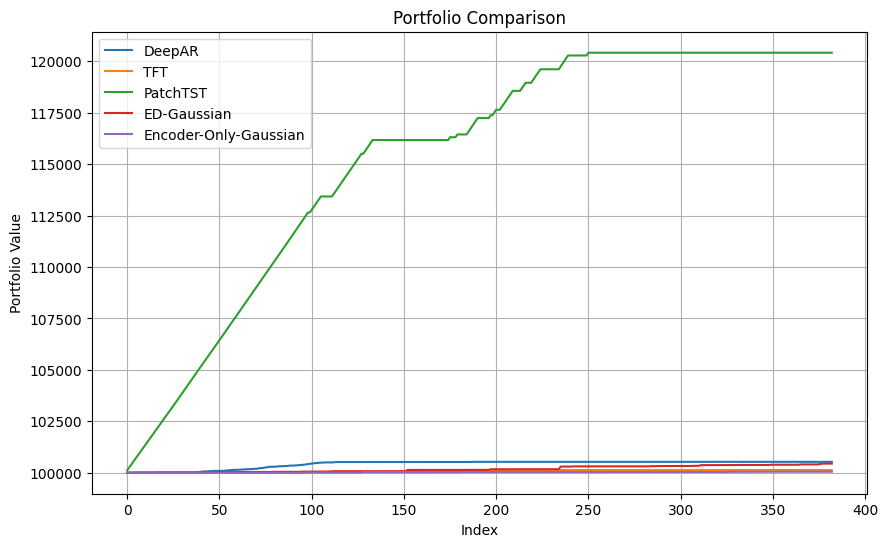

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(final_deepar_portfolio_list, label='DeepAR')
plt.plot(final_tft_portfolio_list, label='TFT')
plt.plot(final_patchtst_portfolio_list, label='PatchTST')
plt.plot(final_ed_gaussian_portfolio_list, label='ED-Gaussian')
plt.plot(final_encoder_only_portfolio_list, label='Encoder-Only-Gaussian')
plt.xlabel('Index')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
deepar_trade_log_df.head()

,idx,signal,price,portfolio
1,0,sell,17498.091797,100000.000000
3,2,sell,17526.000000,100004.550781
5,3,sell,17535.900391,100004.550781
7,6,sell,17535.513672,100004.550781
9,8,sell,17524.914062,100004.550781
